# Initial Data Exploration and Analysis

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns


# specify the date format to be parsed
date_format = '%Y-%m-%d'
# read csv files
billboard_cleaned = pd.read_csv('billboard_dataset/processed/billboard_cleaned.csv', parse_dates=['week_id'], date_format=date_format)
audio_features_merged = pd.read_csv('billboard_dataset/processed/audio_features_merged.csv', parse_dates=['week_id'], date_format=date_format)

In [34]:
print(billboard_cleaned.shape)
print(billboard_cleaned.columns)
billboard_cleaned.head(2)

(327895, 9)
Index(['week_id', 'week_position', 'song', 'performer', 'song_id', 'instance',
       'previous_week_position', 'peak_position', 'weeks_on_chart'],
      dtype='object')


,week_id,week_position,song,performer,song_id,instance,previous_week_position,peak_position,weeks_on_chart
0,1965-07-17,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,1965-07-24,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5


In [35]:
print(audio_features_merged.shape)
print(audio_features_merged.columns)
audio_features_merged.head(2)

(29383, 23)
Index(['song_id', 'performer', 'song', 'spotify_genre',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity',
       'peak_position', 'week_id', 'weeks_on_chart'],
      dtype='object')


,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
0,Solid RockGoanna,Goanna,Solid Rock,"[""australian children's music"", ""children's mu...",275226.0,False,Spirit Of Place (Remastered & Expanded),0.552,0.741,9.0,...,0.00699,0.00133,0.0317,0.508,148.996,4.0,57.0,71,1983-07-23,7
1,Burning HeartVandenberg,Vandenberg,Burning Heart,"[""australian children's music""]",250693.0,False,Vandenberg,0.438,0.546,11.0,...,0.12700,0.00000,0.1820,0.486,125.221,4.0,44.0,39,1983-04-09,14


variables to run analyses:
- tunebat
- key % mode
- duration
- genre
- seasonality


### Billboard Ranking Analysis

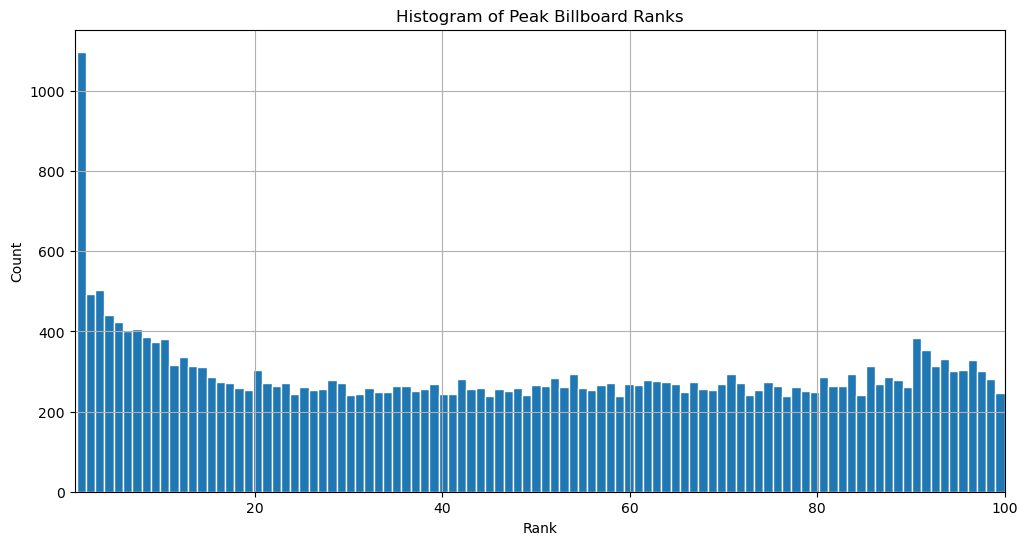

In [36]:
plt.figure(figsize=(12, 6))
audio_features_merged['peak_position'].hist(bins=100, edgecolor='white')
plt.title('Histogram of Peak Billboard Ranks')
plt.xlabel('Rank')
plt.ylabel('Count')
plt.xlim(0.8,100)
plt.show()

Note: Rank 1 is the limit, resulting in the high count.

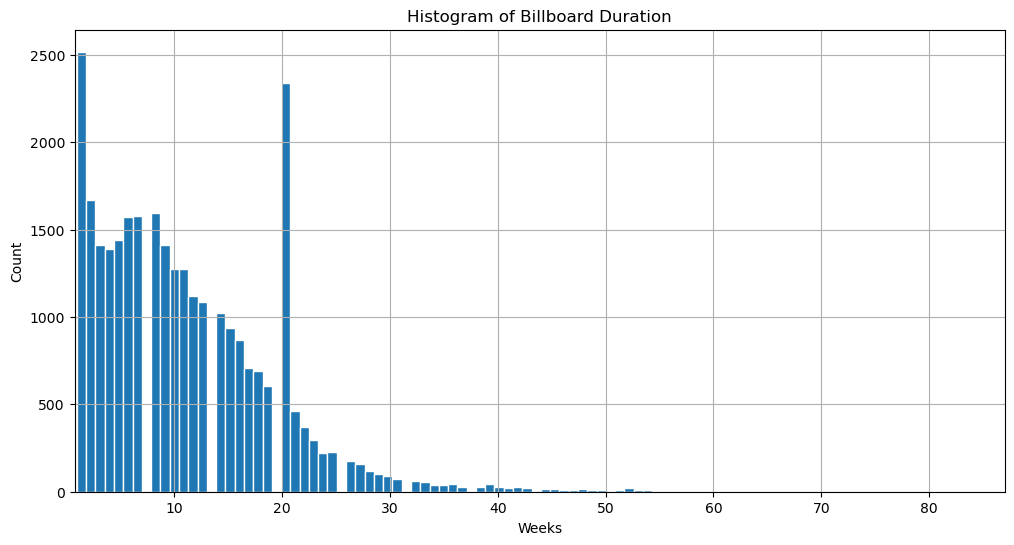

In [37]:
plt.figure(figsize=(12, 6))
audio_features_merged['weeks_on_chart'].hist(bins=100, edgecolor='white')
plt.title('Histogram of Billboard Duration')
plt.xlabel('Weeks')
plt.ylabel('Count')
plt.xlim(0.8, audio_features_merged['weeks_on_chart'].max())
plt.show()

Note the outlier: week 20.

In [38]:
audio_features_merged['weeks_on_chart'].value_counts().head(5)

weeks_on_chart
1     2518
20    2338
2     1667
8     1593
7     1577
Name: count, dtype: int64

In [39]:
# sort by 'peak_position', then 'weeks_on_chart'
top_10_tracks = audio_features_merged.sort_values(['peak_position', 'weeks_on_chart'], ascending=[True, False]).head(10)
top_10_tracks

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
17521,Party Rock AnthemLMFAO Featuring Lauren Bennet...,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,"['dance pop', 'pop', 'pop rap']",262173.0,False,Sorry For Party Rocking,0.750,0.727,5.0,...,0.01890,0.000000,0.2660,0.359,129.993,4.0,68.0,1,2012-07-21,68
10626,Rolling In The DeepAdele,Adele,Rolling In The Deep,"['british soul', 'pop', 'uk pop']",228293.0,False,21,0.729,0.756,8.0,...,0.13100,0.000000,0.0527,0.522,104.945,4.0,76.0,1,2012-04-14,65
19063,CirclesPost Malone,Post Malone,Circles,"['dfw rap', 'melodic rap', 'rap']",215280.0,False,Hollywood's Bleeding,0.695,0.762,0.0,...,0.19200,0.002440,0.0863,0.553,120.042,4.0,98.0,1,2020-11-07,61
18796,Macarena (Bayside Boys Mix)Los Del Rio,Los Del Rio,Macarena (Bayside Boys Mix),"['deep norteno', 'duranguense', 'norteno', 'no...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1997-02-08,60
8224,Somebody That I Used To KnowGotye Featuring Ki...,Gotye Featuring Kimbra,Somebody That I Used To Know,['australian pop'],244973.0,False,Making Mirrors,0.857,0.517,0.0,...,0.56500,0.000195,0.1020,0.754,129.063,4.0,77.0,1,2013-03-02,59
23369,All Of MeJohn Legend,John Legend,All Of Me,"['neo mellow', 'neo soul', 'pop', 'r&b', 'urba...",269560.0,False,Love In The Future (Expanded Edition),0.422,0.264,8.0,...,0.92200,0.000000,0.1320,0.331,119.930,4.0,87.0,1,2014-12-06,59
8910,SmoothSantana Featuring Rob Thomas,Santana Featuring Rob Thomas,Smooth,"['blues rock', 'classic rock']",294986.0,False,Supernatural (Remastered),0.609,0.923,9.0,...,0.16000,0.000005,0.2950,0.961,115.996,4.0,71.0,1,2000-09-02,58
24349,Shape Of YouEd Sheeran,Ed Sheeran,Shape Of You,"['pop', 'uk pop']",233712.0,False,"{'album_type': 'album', 'artists': [{'external...",0.825,0.652,1.0,...,0.58100,0.000000,0.0931,0.931,95.977,4.0,86.0,1,2018-03-03,58
17730,Dark HorseKaty Perry Featuring Juicy J,Katy Perry Featuring Juicy J,Dark Horse,"['dance pop', 'pop', 'post-teen pop']",215672.0,False,PRISM (Deluxe),0.645,0.585,6.0,...,0.00314,0.000000,0.1650,0.353,131.931,4.0,78.0,1,2014-11-01,57
17518,I Gotta FeelingThe Black Eyed Peas,The Black Eyed Peas,I Gotta Feeling,"['dance pop', 'pop', 'pop rap']",289133.0,False,THE E.N.D. (THE ENERGY NEVER DIES),0.741,0.748,0.0,...,0.08230,0.000000,0.3400,0.600,127.965,4.0,70.0,1,2010-07-17,56


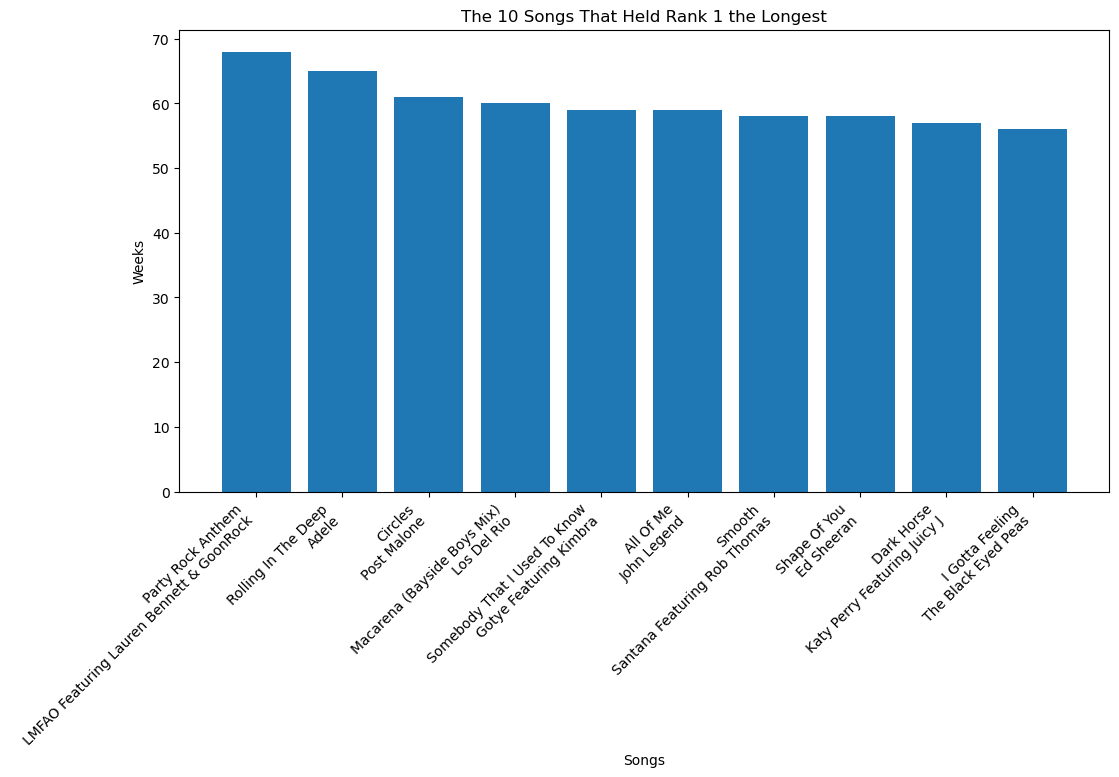

In [40]:
plt.figure(figsize=(12, 6))
title_artist = top_10_tracks['song'] + '\n' + top_10_tracks['performer']
plt.bar(title_artist, top_10_tracks['weeks_on_chart'])
plt.title('The 10 Songs That Held Rank 1 the Longest')
plt.xlabel('Songs')
plt.ylabel('Weeks')
plt.xticks(rotation=45, ha='right')
plt.show()

In [41]:
# sort by 'weeks_on_chart'
top_10_tracks_by_duration = audio_features_merged.sort_values('weeks_on_chart', ascending=False).head(10)
top_10_tracks_by_duration

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart
23155,RadioactiveImagine Dragons,Imagine Dragons,Radioactive,['modern rock'],186813.0,False,Night Visions,0.448,0.784,9.0,...,0.10600,0.000108,0.6680,0.236,136.245,4.0,74.0,3,2014-05-10,87
22409,SailAWOLNATION,AWOLNATION,Sail,"['indie pop', 'la indie', 'modern alternative ...",259102.0,False,Megalithic Symphony Deluxe,0.825,0.435,1.0,...,0.45200,0.609000,0.0953,0.243,119.038,4.0,74.0,17,2014-03-22,79
11268,Blinding LightsThe Weeknd,The Weeknd,Blinding Lights,"['canadian contemporary r&b', 'canadian pop', ...",201573.0,False,Blinding Lights,0.513,0.796,1.0,...,0.00147,0.000209,0.0938,0.345,171.017,4.0,96.0,3,2021-05-29,76
130,I'm YoursJason Mraz,Jason Mraz,I'm Yours,"['acoustic pop', 'neo mellow', 'pop', 'pop rock']",242186.0,False,We Sing. We Dance. We Steal Things.,0.686,0.457,11.0,...,0.59500,0.000000,0.1050,0.718,150.953,4.0,83.0,6,2009-10-10,76
15661,How Do I LiveLeAnn Rimes,LeAnn Rimes,How Do I Live,"['country', 'country dawn', 'dance pop', 'pop ...",266973.0,False,Greatest Hits,0.577,0.462,2.0,...,0.12800,0.000000,0.0822,0.258,128.303,4.0,68.0,2,1998-10-10,69
17521,Party Rock AnthemLMFAO Featuring Lauren Bennet...,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,"['dance pop', 'pop', 'pop rap']",262173.0,False,Sorry For Party Rocking,0.750,0.727,5.0,...,0.01890,0.000000,0.2660,0.359,129.993,4.0,68.0,1,2012-07-21,68
17181,Counting StarsOneRepublic,OneRepublic,Counting Stars,"['dance pop', 'neo mellow', 'piano rock', 'pop...",257839.0,False,Native,0.664,0.705,1.0,...,0.06540,0.000000,0.1150,0.477,122.017,4.0,75.0,2,2014-10-18,68
3886,Foolish Games/You Were Meant For MeJewel,Jewel,Foolish Games/You Were Meant For Me,"['alaska indie', 'lilith', 'permanent wave', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1998-02-21,65
10626,Rolling In The DeepAdele,Adele,Rolling In The Deep,"['british soul', 'pop', 'uk pop']",228293.0,False,21,0.729,0.756,8.0,...,0.13100,0.000000,0.0527,0.522,104.945,4.0,76.0,1,2012-04-14,65
14398,Before He CheatsCarrie Underwood,Carrie Underwood,Before He Cheats,"['contemporary country', 'country', 'country d...",199946.0,False,Some Hearts,0.519,0.749,6.0,...,0.27100,0.000000,0.1190,0.290,147.905,4.0,74.0,8,2007-12-01,64


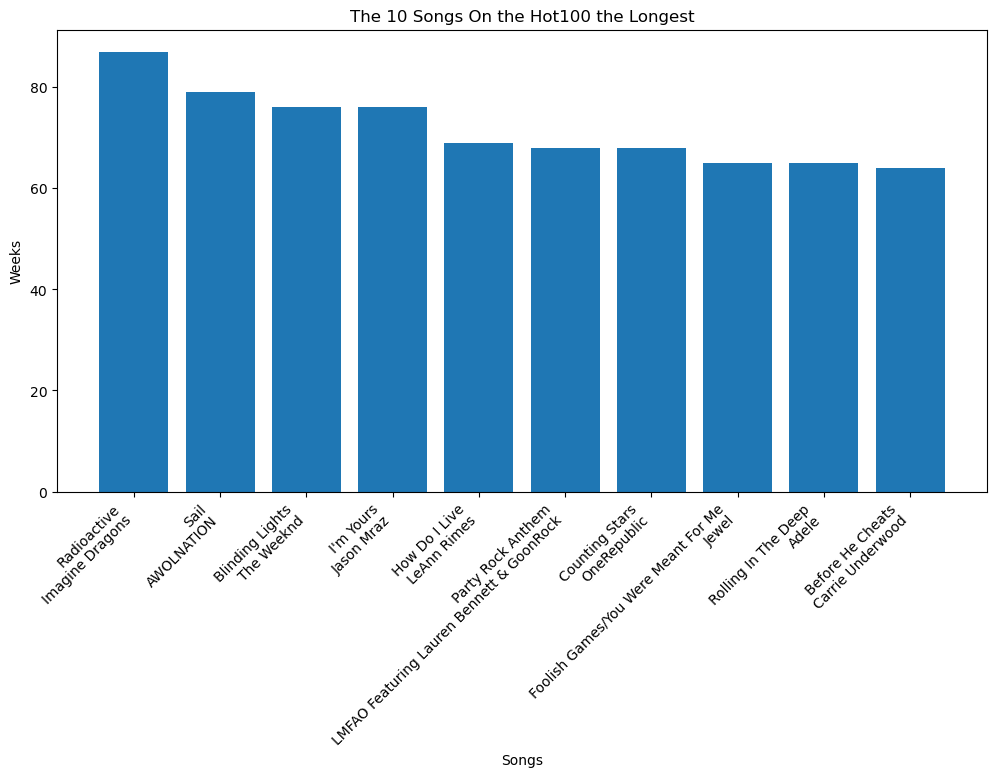

In [42]:
plt.figure(figsize=(12, 6))
title_artist = top_10_tracks_by_duration['song'] + '\n' + top_10_tracks_by_duration['performer']
plt.bar(title_artist, top_10_tracks_by_duration['weeks_on_chart'])
plt.title('The 10 Songs On the Hot100 the Longest')
plt.xlabel('Songs')
plt.ylabel('Weeks')
plt.xticks(rotation=45, ha='right')
plt.show()

# Spotify Audio Features Analysis

In [43]:
audio_features_merged.dtypes

song_id                              object
performer                            object
song                                 object
spotify_genre                        object
spotify_track_duration_ms           float64
spotify_track_explicit               object
spotify_track_album                  object
danceability                        float64
energy                              float64
key                                 float64
loudness                            float64
mode                                float64
speechiness                         float64
acousticness                        float64
instrumentalness                    float64
liveness                            float64
valence                             float64
tempo                               float64
time_signature                      float64
spotify_track_popularity            float64
peak_position                         int64
week_id                      datetime64[ns]
weeks_on_chart                  

In [44]:
audio_features_merged.isna().sum()

song_id                         0
performer                       0
song                            0
spotify_genre                4151
spotify_track_duration_ms    5097
spotify_track_explicit       5097
spotify_track_album          5103
danceability                 5159
energy                       5159
key                          5159
loudness                     5159
mode                         5159
speechiness                  5159
acousticness                 5159
instrumentalness             5159
liveness                     5159
valence                      5159
tempo                        5159
time_signature               5159
spotify_track_popularity     5097
peak_position                   0
week_id                         0
weeks_on_chart                  0
dtype: int64

5159 tracks don't have the audio features. Will drop for this section.

In [45]:
# list of spotify audio features (values between 0-1)
audio_features_list = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

In [46]:
# check if those 5159 tracks have NaN values for all audio_features columns
audio_features_merged[audio_features_list].isna().all(axis=1).sum()

5159

In [47]:
# drop rows where all audio feature columns are nan
audio_features_subset = audio_features_merged.dropna(subset=audio_features_list, how='all')
print(audio_features_subset.shape)
audio_features_subset.isna().sum()

(24224, 23)


song_id                         0
performer                       0
song                            0
spotify_genre                1594
spotify_track_duration_ms       4
spotify_track_explicit          4
spotify_track_album            10
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
time_signature                  0
spotify_track_popularity        4
peak_position                   0
week_id                         0
weeks_on_chart                  0
dtype: int64

### Bell Curves

In [48]:
# filter df to just audio features columns
spotify_audio_features = audio_features_subset[audio_features_list]
print(spotify_audio_features.shape)
print(spotify_audio_features.columns)
spotify_audio_features.describe()

(24224, 7)
Index(['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence'],
      dtype='object')


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
count,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000
mean,0.599602,0.618050,0.073368,0.294848,0.032660,0.192165,0.602034
std,0.153075,0.199195,0.082943,0.282438,0.136551,0.159186,0.238675
min,0.000000,0.000581,0.000000,0.000003,0.000000,0.009670,0.000000
25%,0.499000,0.476000,0.032100,0.046600,0.000000,0.090900,0.415000
50%,0.608000,0.634000,0.041200,0.195000,0.000005,0.131000,0.622000
75%,0.708000,0.778000,0.068100,0.508250,0.000469,0.249000,0.802000
max,0.988000,0.997000,0.951000,0.991000,0.982000,0.999000,0.991000


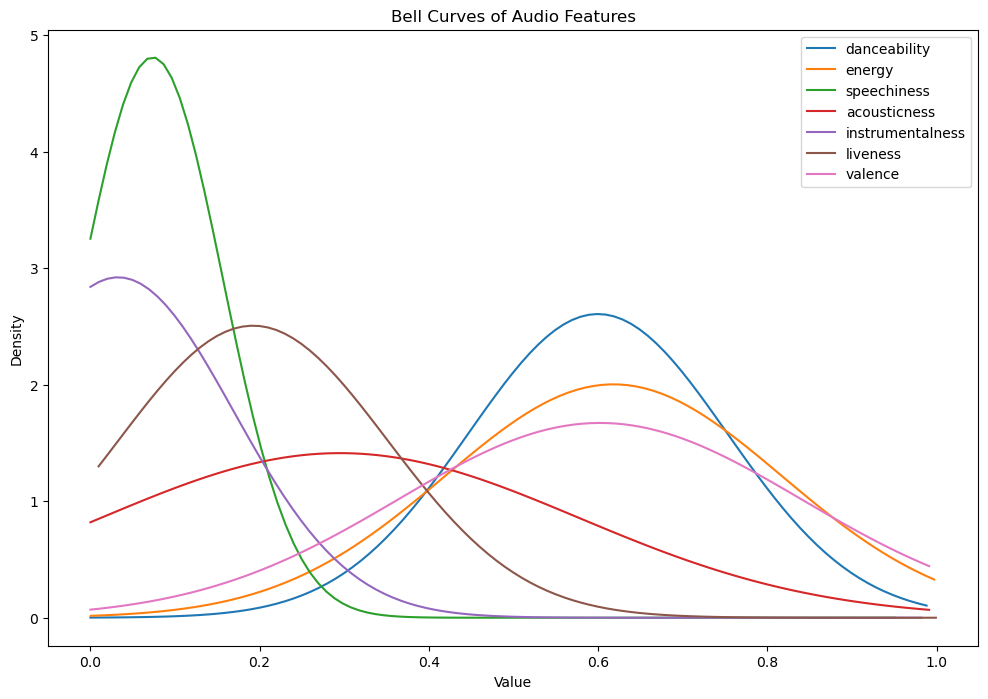

In [170]:
from scipy.stats import norm

plt.figure(figsize=(12, 8))

# plot bell curve for each feature
for feature in spotify_audio_features.columns:
    x = np.linspace(spotify_audio_features[feature].min(), spotify_audio_features[feature].max(), 100)
    plt.plot(x, norm.pdf(x, spotify_audio_features[feature].mean(), spotify_audio_features[feature].std()), label=feature)

plt.title('Bell Curves of Audio Features')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

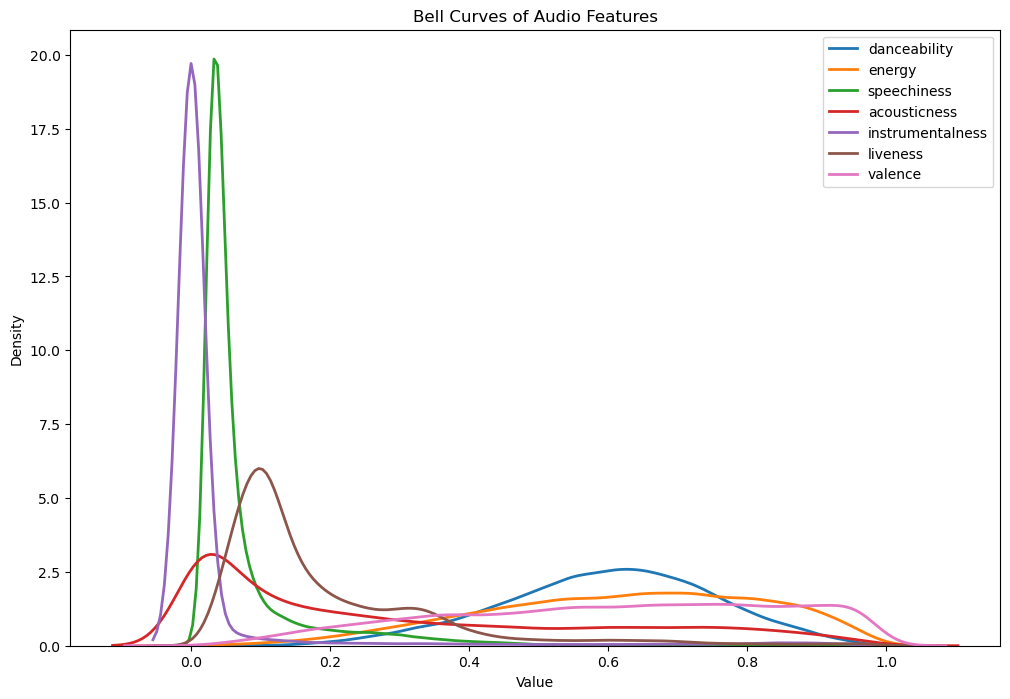

In [171]:
plt.figure(figsize=(12, 8))
   
# plot histogram for each feature
for feature in spotify_audio_features.columns:
    sns.kdeplot(spotify_audio_features[feature], label=feature, linewidth=2)

plt.title('Bell Curves of Audio Features')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))

# plot bell curve for each feature
for feature in spotify_audio_features.columns:
    x = np.linspace(spotify_audio_features[feature].min(), spotify_audio_features[feature].max(), 100)
    plt.plot(x, norm.pdf(x, spotify_audio_features[feature].mean(), spotify_audio_features[feature].std()), label=feature)

plt.title('Bell Curves of Audio Features')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

Description of each feature copied from the Spotify API documentation:

| Feature          | Description                                                                                                                                               |
|:-----------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Danceability     | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable, and 1.0 is most danceable.|
| Energy           | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
| Speechiness      | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g., talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
| Acousticness     | Acousticness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence that the track is acoustic.|
| Instrumentalness | Instrumentalness predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater the likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
| Liveness         | Liveness detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.|
| Valence          | Valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g., happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g., sad, depressed, angry).|


In [50]:
# filter to tracks that hit rank 1
top_tracks = audio_features_subset[audio_features_subset['peak_position'] == 1][audio_features_list]
print(top_tracks.shape)
top_tracks.head(5)

(981, 7)


,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
22,0.414,0.167,0.0484,0.8040,0.000000,0.1170,0.384
207,0.429,0.564,0.0268,0.0193,0.000828,0.1280,0.276
209,0.398,0.570,0.0340,0.0560,0.001250,0.0606,0.234
214,0.553,0.545,0.0261,0.3850,0.000005,0.1050,0.201
253,0.526,0.515,0.0389,0.1690,0.000816,0.1810,0.518


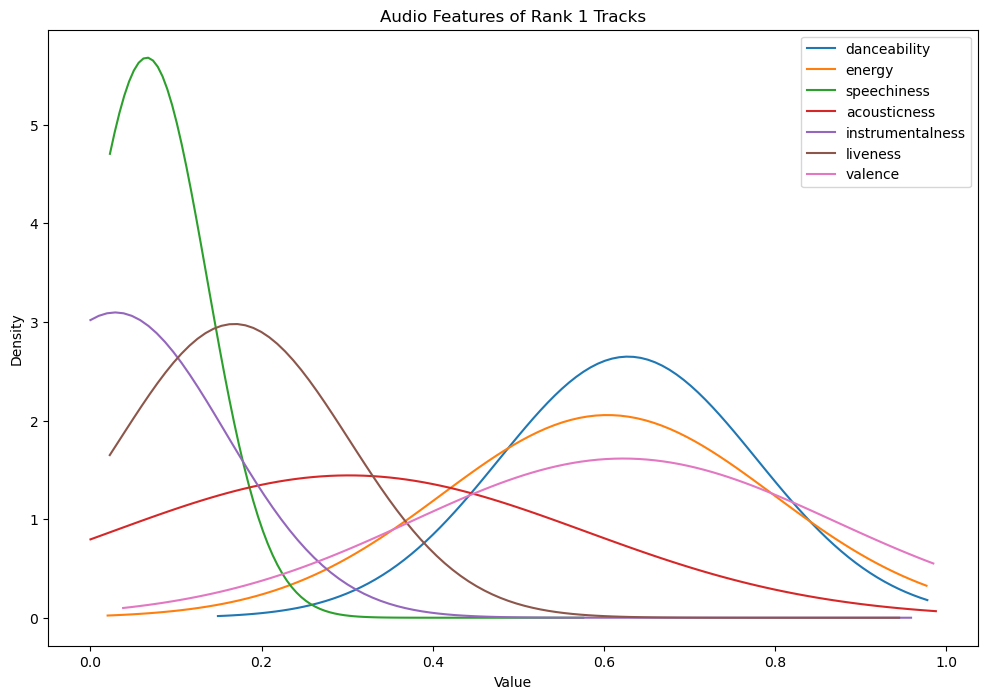

In [51]:
plt.figure(figsize=(12, 8))

# plot bell curve for each feature
for feature in top_tracks.columns:
    x = np.linspace(top_tracks[feature].min(), top_tracks[feature].max(), 100)
    plt.plot(x, norm.pdf(x, top_tracks[feature].mean(), top_tracks[feature].std()), label=feature)

plt.title('Audio Features of Rank 1 Tracks')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

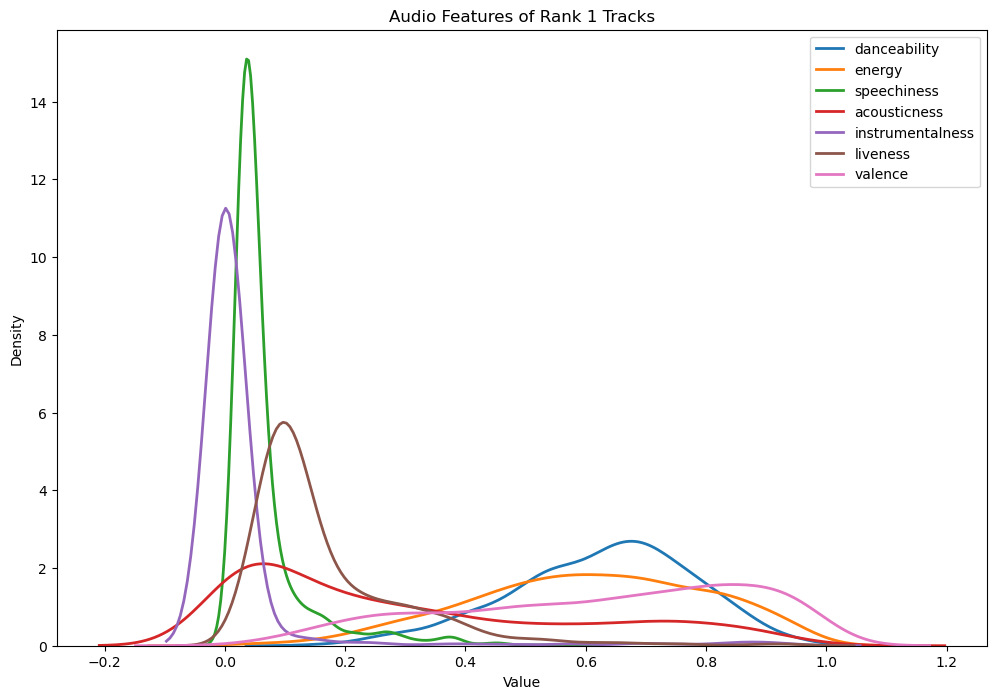

In [172]:
plt.figure(figsize=(12, 8))
   
# plot histogram for each feature
for feature in top_tracks.columns:
    sns.kdeplot(top_tracks[feature], label=feature, linewidth=2)

plt.title('Audio Features of Rank 1 Tracks')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

In [55]:
# filter to tracks that didn't make it past rank 80
bottom_tracks_subset = audio_features_merged[audio_features_merged['peak_position'] > 80][audio_features_list]
bottom_tracks_subset.shape

(5902, 7)

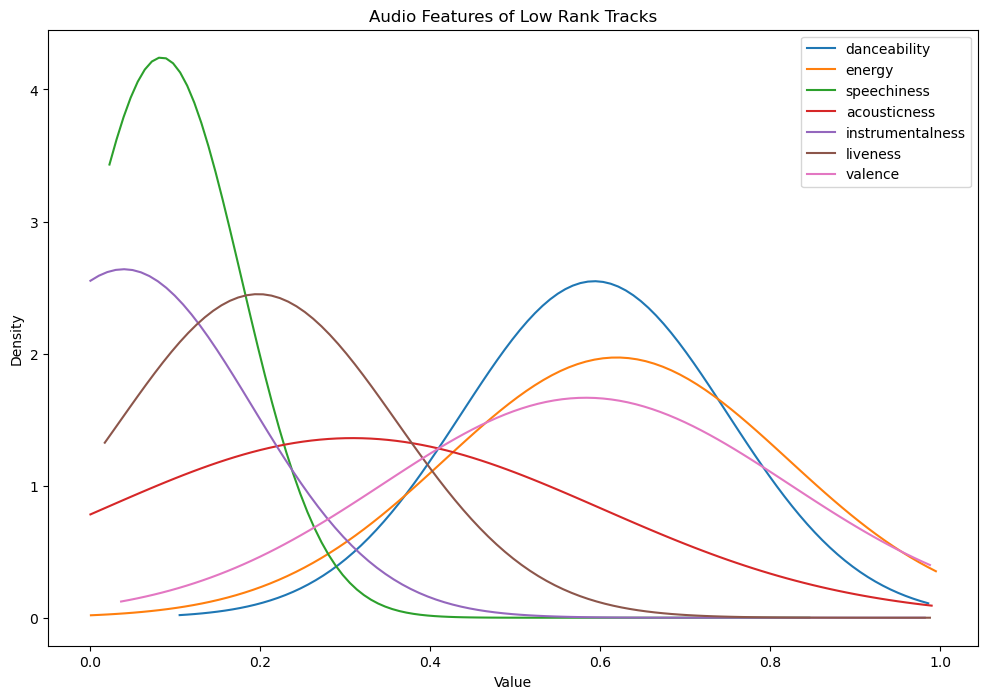

In [56]:
plt.figure(figsize=(12, 8))

# plot bell curve for each feature
for feature in bottom_tracks_subset.columns:
    x = np.linspace(bottom_tracks_subset[feature].min(), bottom_tracks_subset[feature].max(), 100)
    plt.plot(x, norm.pdf(x, bottom_tracks_subset[feature].mean(), bottom_tracks_subset[feature].std()), label=feature)

plt.title('Audio Features of Low Rank Tracks')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

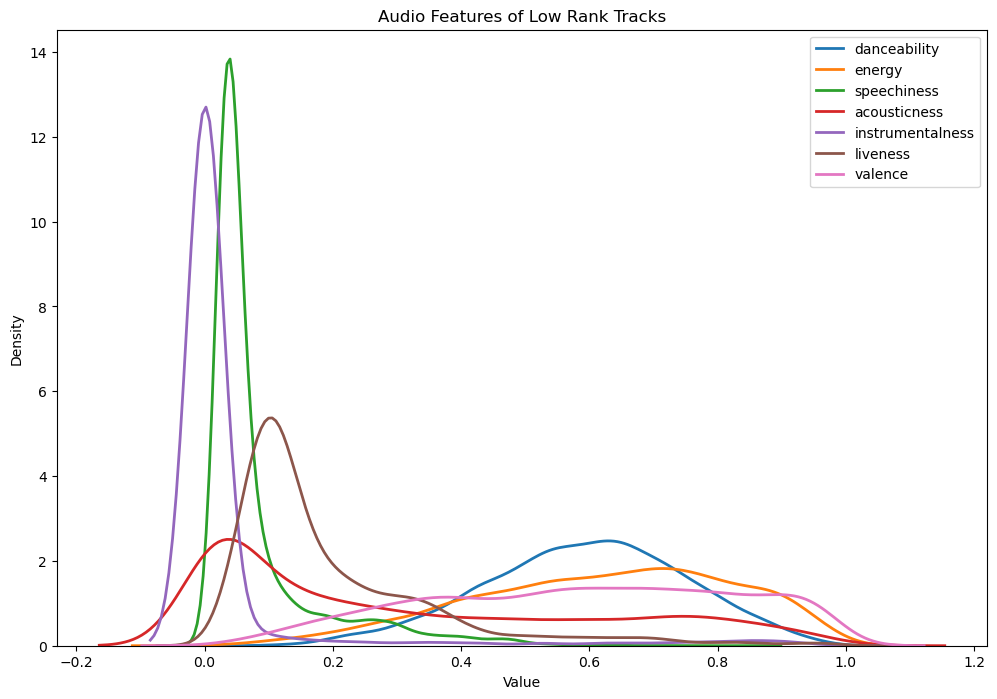

In [173]:
plt.figure(figsize=(12, 8))
   
# plot histogram for each feature
for feature in bottom_tracks_subset.columns:
    sns.kdeplot(bottom_tracks_subset[feature], label=feature, linewidth=2)

plt.title('Audio Features of Low Rank Tracks')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

What about using popularity instead of rank?

In [ ]:
# filter to tracks that didn't make it past rank 80
bottom_tracks_subset = audio_features_merged[audio_features_merged['peak_position'] > 80][audio_features_list]
bottom_tracks_subset.shape

### Histograms

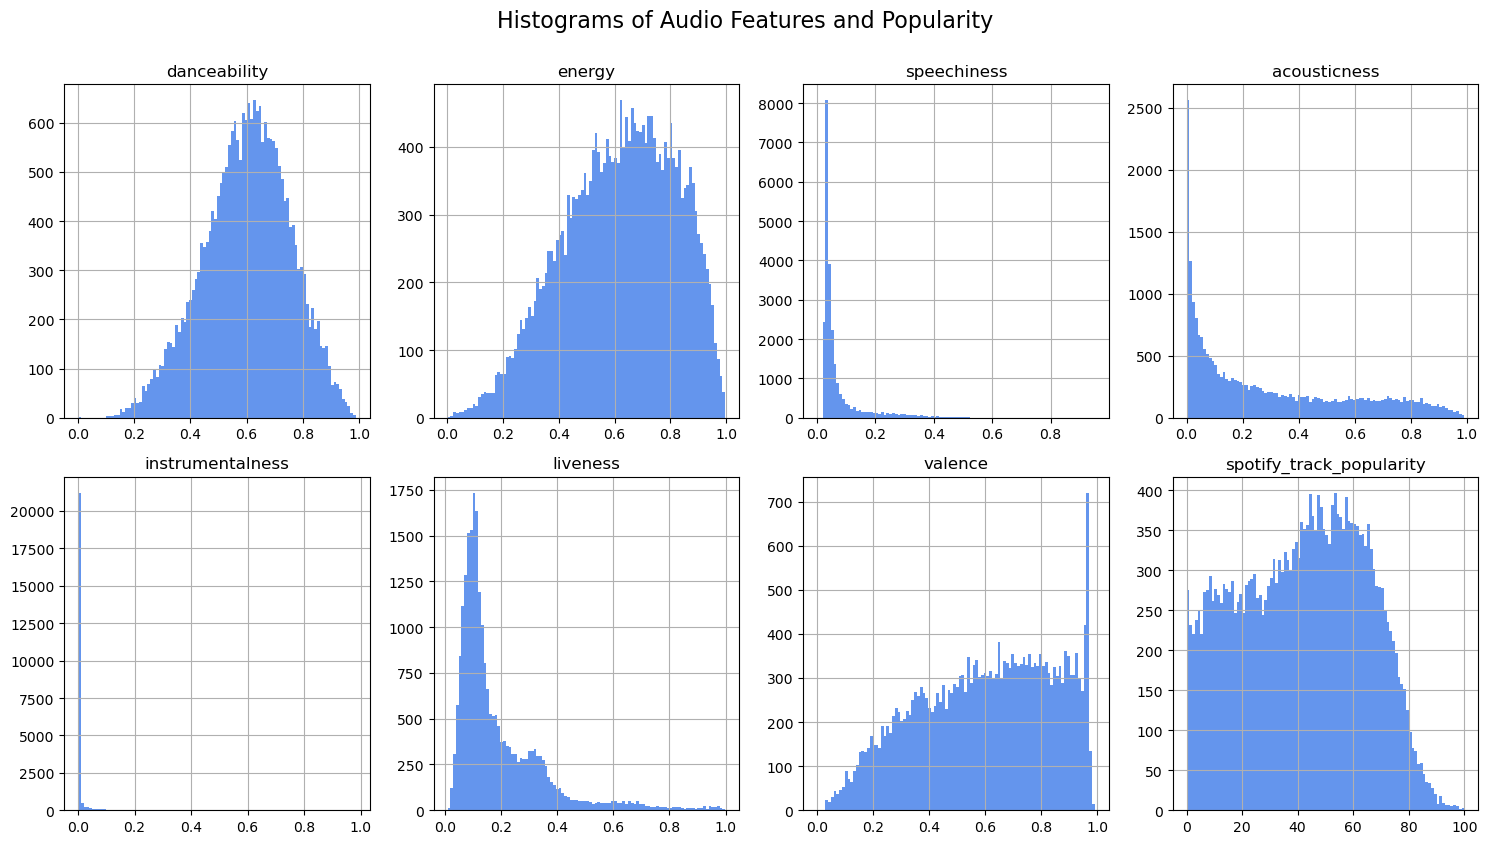

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    axes[i].hist(audio_features_subset[feature], bins=100, color='#6495ED')
    axes[i].set_title(feature)
    axes[i].grid(True)

plt.tight_layout()
plt.suptitle('Histograms of Audio Features and Popularity', fontsize=16, y=1.05)
plt.show()

In [82]:
# filter to tracks before 2000
pre_2000_tracks = audio_features_merged[audio_features_merged['week_id'].dt.year < 2000][audio_features_list]
pre_2000_tracks.shape

(20483, 7)

In [58]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

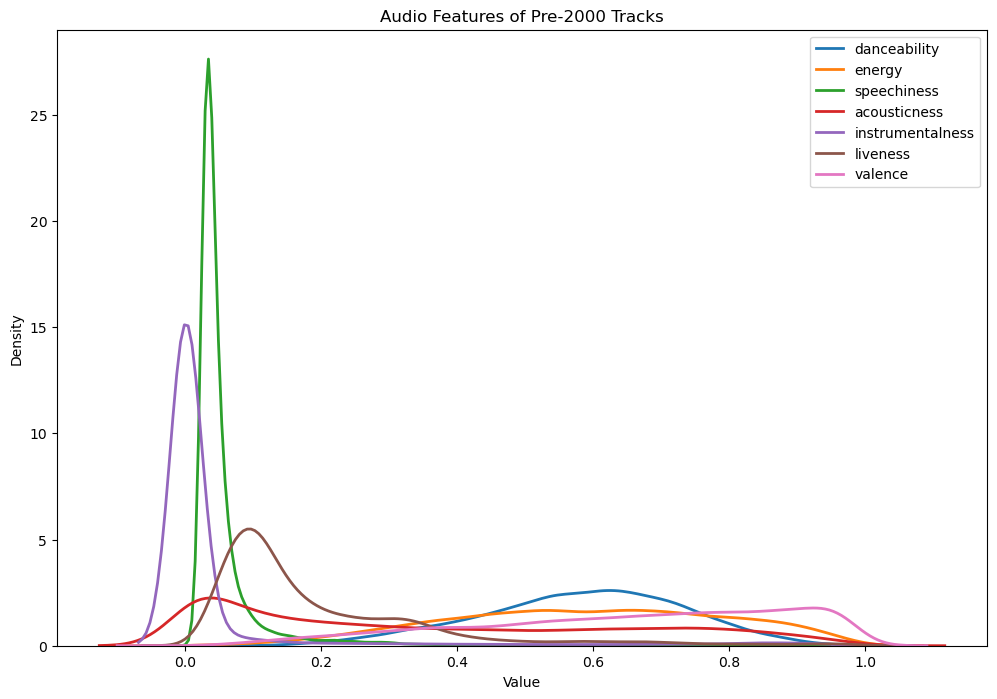

In [84]:
plt.figure(figsize=(12, 8))

# plot histogram for each feature
for feature in pre_2000_tracks.columns:
    sns.kdeplot(pre_2000_tracks[feature], label=feature, linewidth=2)

plt.title('Audio Features of Pre-2000 Tracks')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

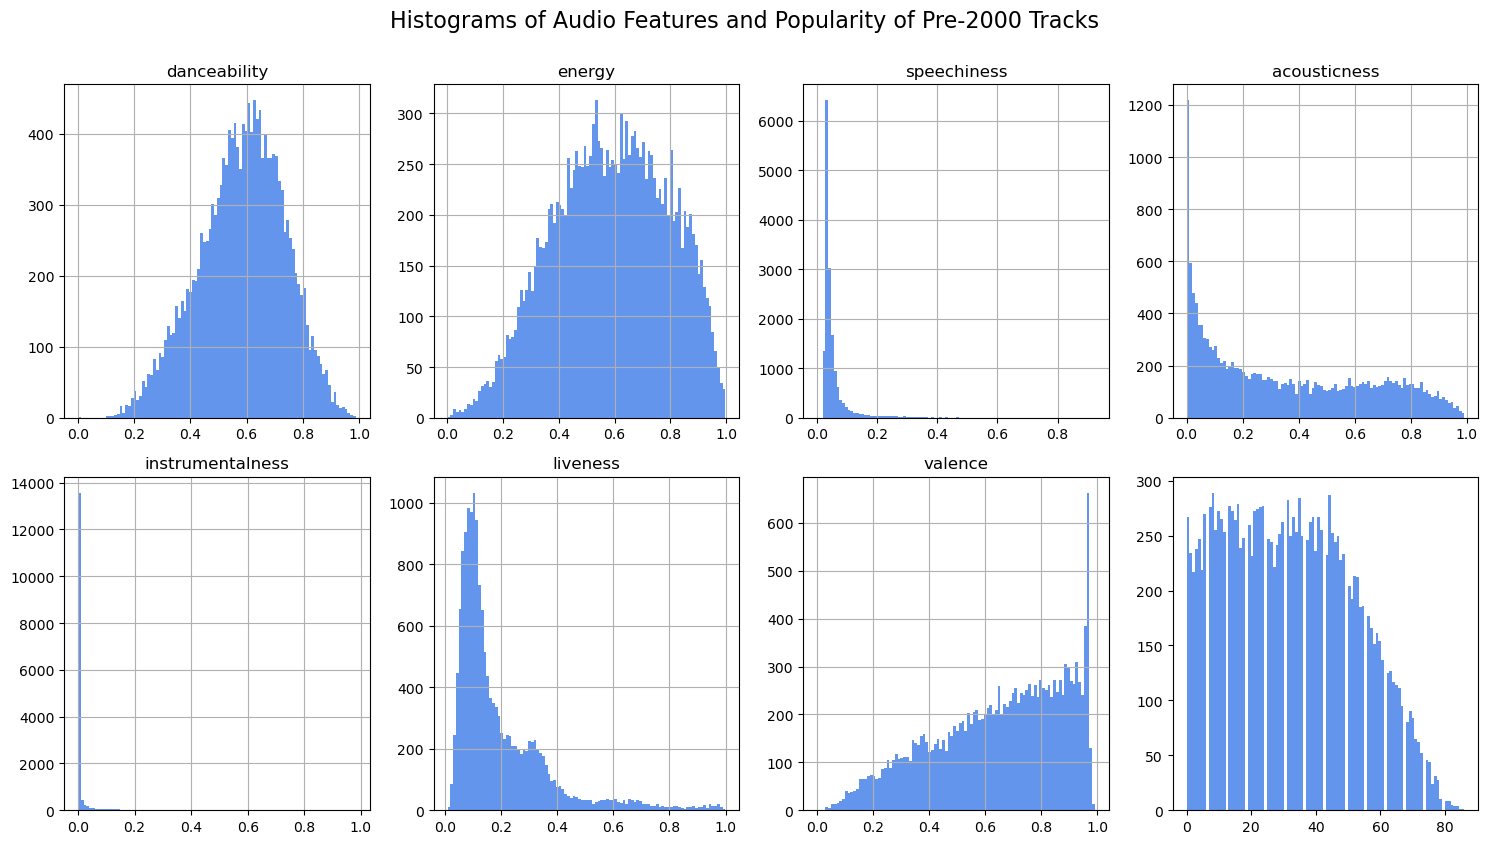

In [95]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list):
    axes[i].hist(pre_2000_tracks[feature], bins=100, color='#6495ED')
    axes[i].set_title(feature)
    axes[i].grid(True)
    
# plot popularity scores for pre-2000 tracks
axes[7].hist(audio_features_merged[audio_features_merged['week_id'].dt.year < 2000]['spotify_track_popularity'], bins=100, color='#6495ED')

plt.tight_layout()
plt.suptitle('Histograms of Audio Features and Popularity of Pre-2000 Tracks', fontsize=16, y=1.05)
plt.show()

In [60]:
# filter to tracks post 2000
post_2000_tracks = audio_features_subset[audio_features_subset['week_id'].dt.year >= 2000][audio_features_list]
post_2000_tracks.shape

(7997, 7)

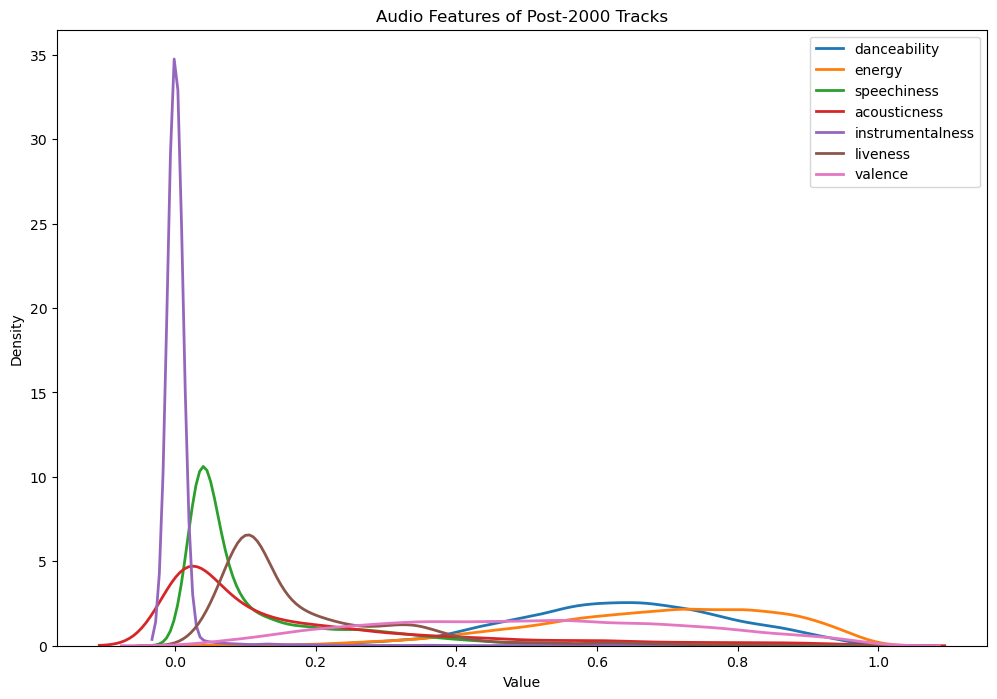

In [61]:
plt.figure(figsize=(12, 8))

# plot histogram for each feature
for feature in post_2000_tracks.columns:
    sns.kdeplot(post_2000_tracks[feature], label=feature, linewidth=2)

plt.title('Audio Features of Post-2000 Tracks')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()

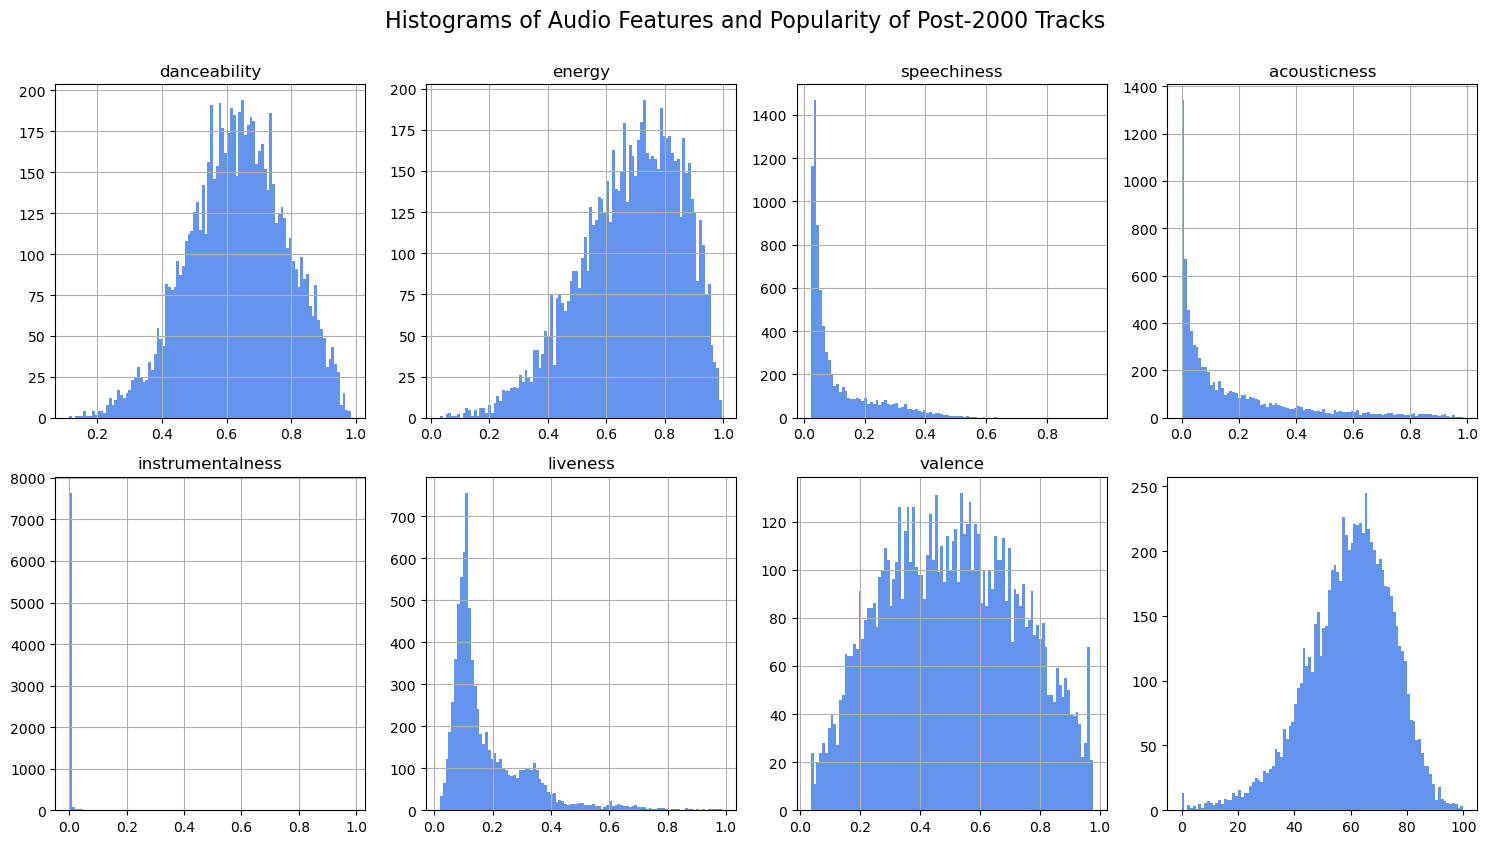

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# iterate through audio features + popularity score
for i, feature in enumerate(post_2000_tracks):
    axes[i].hist(post_2000_tracks[feature], bins=100, color='#6495ED')
    axes[i].set_title(feature)
    axes[i].grid(True)
    
# plot popularity scores for post-2000 tracks
axes[7].hist(audio_features_merged[audio_features_merged['week_id'].dt.year >= 2000]['spotify_track_popularity'], bins=100, color='#6495ED')

plt.tight_layout()
plt.suptitle('Histograms of Audio Features and Popularity of Post-2000 Tracks', fontsize=16, y=1.05)
plt.show()

### Seaborn Histplot Heatmaps

In [106]:
# add year column (I should've done this earlier...)
audio_features_merged['year'] = audio_features_merged['week_id'].dt.year
audio_features_subset = audio_features_merged.dropna(subset=audio_features_list, how='all')

When plotting heat map, inf error.<br>
Ex. ValueError: autodetected range of [-inf, -0.005243055412371884] is not finite

In [160]:
# why do i keep getting value error?
for feature in audio_features_list:
    non_finite_values = audio_features_subset[feature][~np.isfinite(audio_features_subset[feature])]

    # print the non-finite values
    print("Non-finite values in {}: {}".format(feature, non_finite_values))

Non-finite values in danceability: Series([], Name: danceability, dtype: float64)
Non-finite values in energy: Series([], Name: energy, dtype: float64)
Non-finite values in speechiness: Series([], Name: speechiness, dtype: float64)
Non-finite values in acousticness: Series([], Name: acousticness, dtype: float64)
Non-finite values in instrumentalness: Series([], Name: instrumentalness, dtype: float64)
Non-finite values in liveness: Series([], Name: liveness, dtype: float64)
Non-finite values in valence: Series([], Name: valence, dtype: float64)


In [124]:
non_finite_values = audio_features_subset['spotify_track_popularity'][~np.isfinite(audio_features_subset['spotify_track_popularity'])]
print(f"Non-finite values in spotify_track_popularity: {non_finite_values}")

Non-finite values in spotify_track_popularity: Series([], Name: spotify_track_popularity, dtype: float64)


In [119]:
audio_features_subset[audio_features_subset['spotify_track_popularity'].isna()]

,song_id,performer,song,spotify_genre,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity,peak_position,week_id,weeks_on_chart,year
20778,Forever MoreStevie B,Stevie B,Forever More,['freestyle'],NaN,NaN,NaN,0.612,0.794,10.0,...,0.000063,0.1210,0.765,107.988,4.0,NaN,96,1991-11-16,4,1991
26933,A Thousand Miles AwayThe Heartbeats,The Heartbeats,A Thousand Miles Away,NaN,NaN,NaN,NaN,0.461,0.271,7.0,...,0.000000,0.1200,0.425,166.282,5.0,NaN,96,1960-11-05,1,1960
27108,Big City Miss Ruth AnnGallery,Gallery,Big City Miss Ruth Ann,NaN,NaN,NaN,NaN,0.732,0.731,2.0,...,0.028300,0.0723,0.971,128.713,4.0,NaN,23,1973-04-07,15,1973
27364,Do Ya Wanna Get Funky With MePeter Brown,Peter Brown,Do Ya Wanna Get Funky With Me,NaN,NaN,NaN,NaN,0.703,0.804,4.0,...,0.011200,0.3540,0.441,98.074,4.0,NaN,18,1977-12-17,14,1977


In [123]:
# quick data clean using tunebat.com
audio_features_subset.loc[20778, 'spotify_track_popularity'] = 1
audio_features_subset.loc[26933, 'spotify_track_popularity'] = 41
audio_features_subset.loc[27108, 'spotify_track_popularity'] = 17
audio_features_subset.loc[27364, 'spotify_track_popularity'] = 28

In [125]:
non_finite_values = audio_features_subset['spotify_track_popularity'][~np.isfinite(audio_features_subset['spotify_track_popularity'])]
print(f"Non-finite values in spotify_track_popularity: {non_finite_values}")

Non-finite values in spotify_track_popularity: Series([], Name: spotify_track_popularity, dtype: float64)


In [127]:
for feature in audio_features_list + ['spotify_track_popularity']:
    feature_data = audio_features_subset[feature]
    print(f"Column: {feature}")
    print(f"Min value: {feature_data.min()}")
    print(f"Max value: {feature_data.max()}")
    print(f"NaN values: {feature_data.isna().sum()}")
    print(f"Inf values: {np.isinf(feature_data).sum()}")
    print("---")

Column: danceability
Min value: 0.0
Max value: 0.988
NaN values: 0
Inf values: 0
---
Column: energy
Min value: 0.000581
Max value: 0.997
NaN values: 0
Inf values: 0
---
Column: speechiness
Min value: 0.0
Max value: 0.951
NaN values: 0
Inf values: 0
---
Column: acousticness
Min value: 2.51e-06
Max value: 0.991
NaN values: 0
Inf values: 0
---
Column: instrumentalness
Min value: 0.0
Max value: 0.982
NaN values: 0
Inf values: 0
---
Column: liveness
Min value: 0.00967
Max value: 0.999
NaN values: 0
Inf values: 0
---
Column: valence
Min value: 0.0
Max value: 0.991
NaN values: 0
Inf values: 0
---
Column: spotify_track_popularity
Min value: 0.0
Max value: 100.0
NaN values: 0
Inf values: 0
---


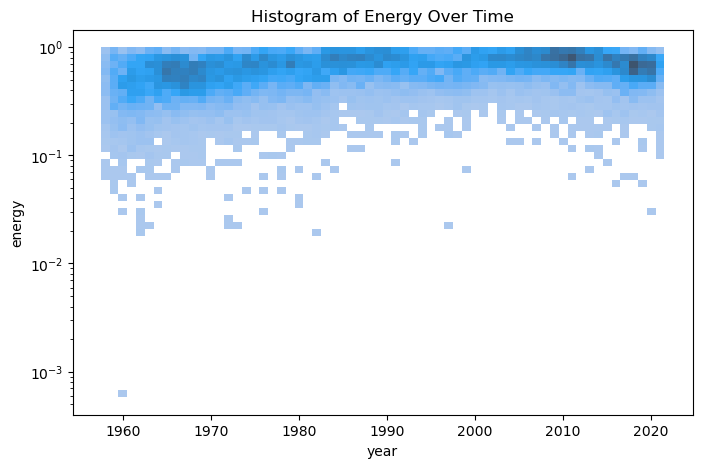

In [158]:
selected_feature = audio_features_list[1]

plt.figure(figsize=(8, 5))

# plot histogram
sns.histplot(
    data=audio_features_subset, x="year", y=selected_feature,
    bins=50, discrete=(True, False), log_scale=(False, True)
)

plt.title(f'Histogram of {selected_feature.capitalize()} Over Time')
plt.show()

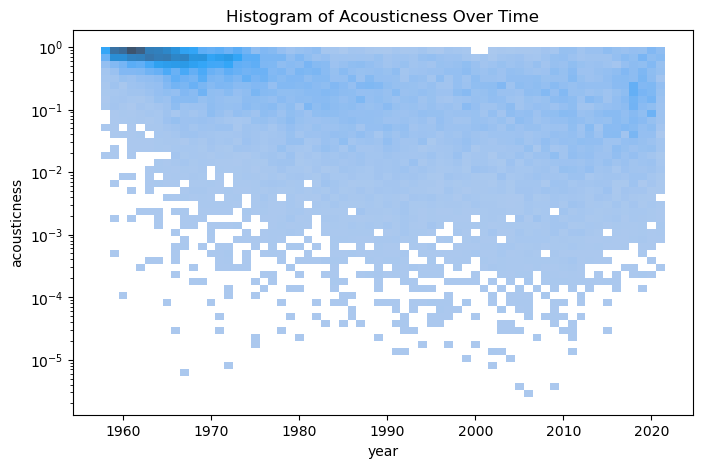

In [157]:
selected_feature = audio_features_list[3]

plt.figure(figsize=(8, 5))

# plot histogram
sns.histplot(
    data=audio_features_subset, x="year", y=selected_feature,
    bins=50, discrete=(True, False), log_scale=(False, True)
)

plt.title(f'Histogram of {selected_feature.capitalize()} Over Time')
plt.show()

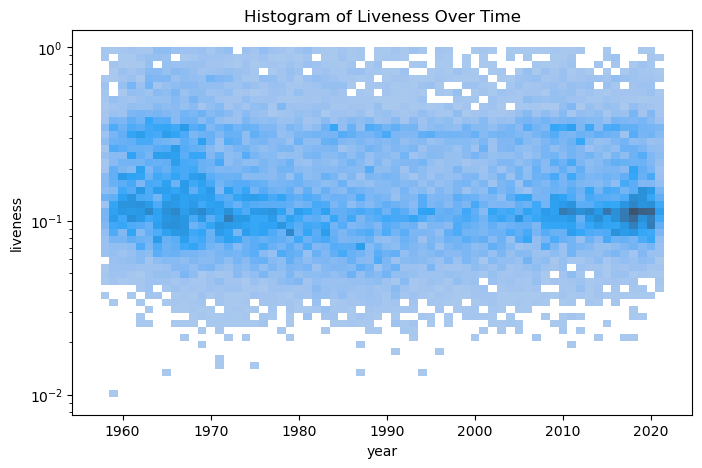

In [156]:
selected_feature = audio_features_list[5]

plt.figure(figsize=(8, 5))

# plot histogram
sns.histplot(
    data=audio_features_subset, x="year", y=selected_feature,
    bins=50, discrete=(True, False), log_scale=(False, True)
)

plt.title(f'Histogram of {selected_feature.capitalize()} Over Time')
plt.show()

.. only 3 out of 7 features work. popularity also doesn't work...

In [159]:
error_features = ['danceability', 'speechiness', 'instrumentalness', 'valence', 'spotify_track_popularity']

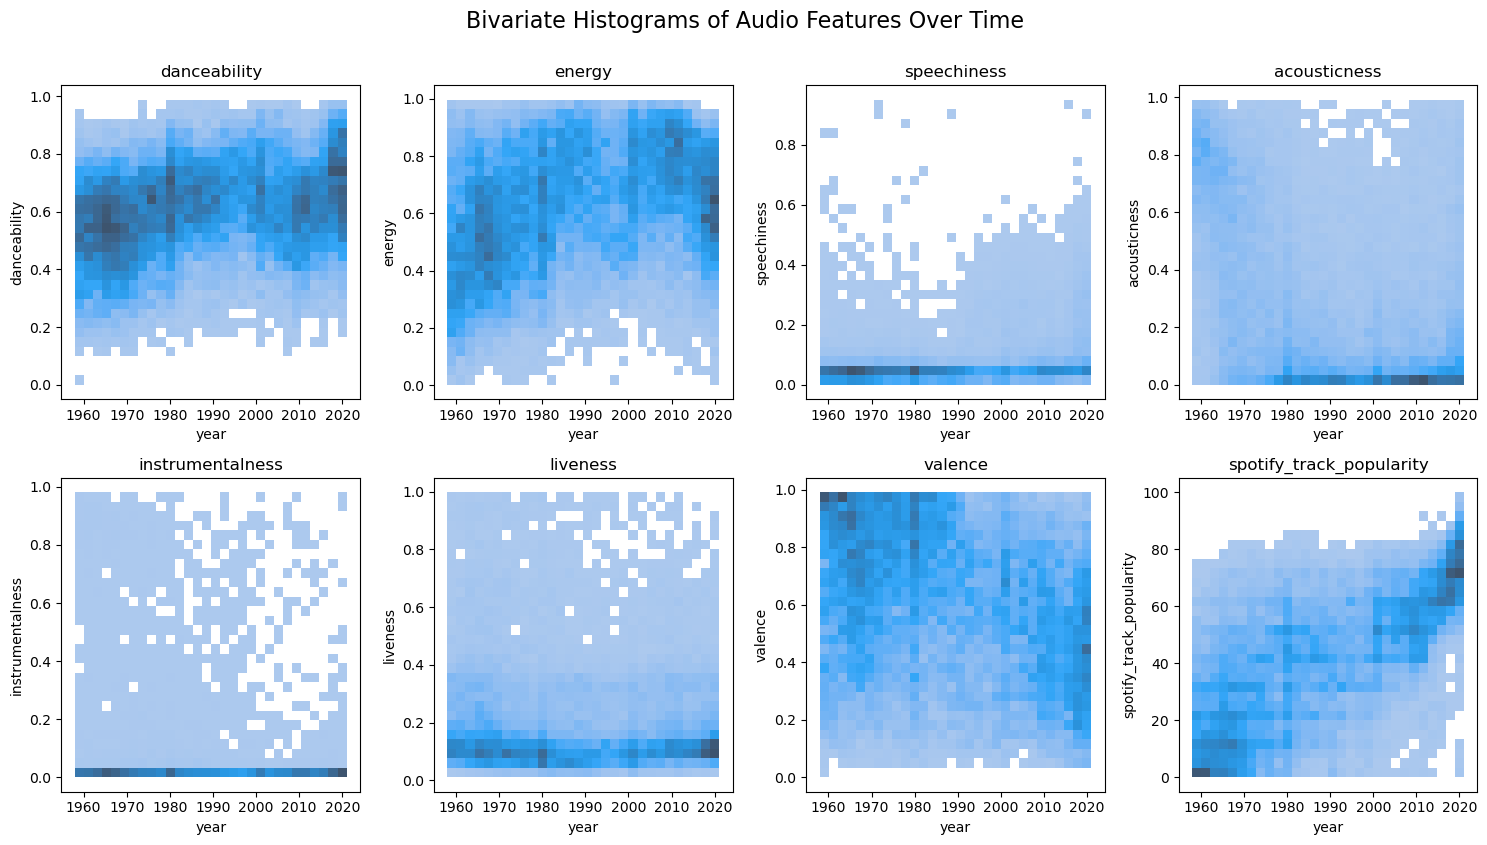

In [167]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

# flatten for indexing
axes = axes.flatten()

# iterate through audio features + popularity score
for i, feature in enumerate(audio_features_list + ['spotify_track_popularity']):
    sns.histplot(
        data=audio_features_subset, x="year", y=feature, bins=30, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.suptitle('Bivariate Histograms of Audio Features Over Time', fontsize=16, y=1.05)
plt.show()

error fixed when i deleted discrete and log_scale parameters used in documentation...

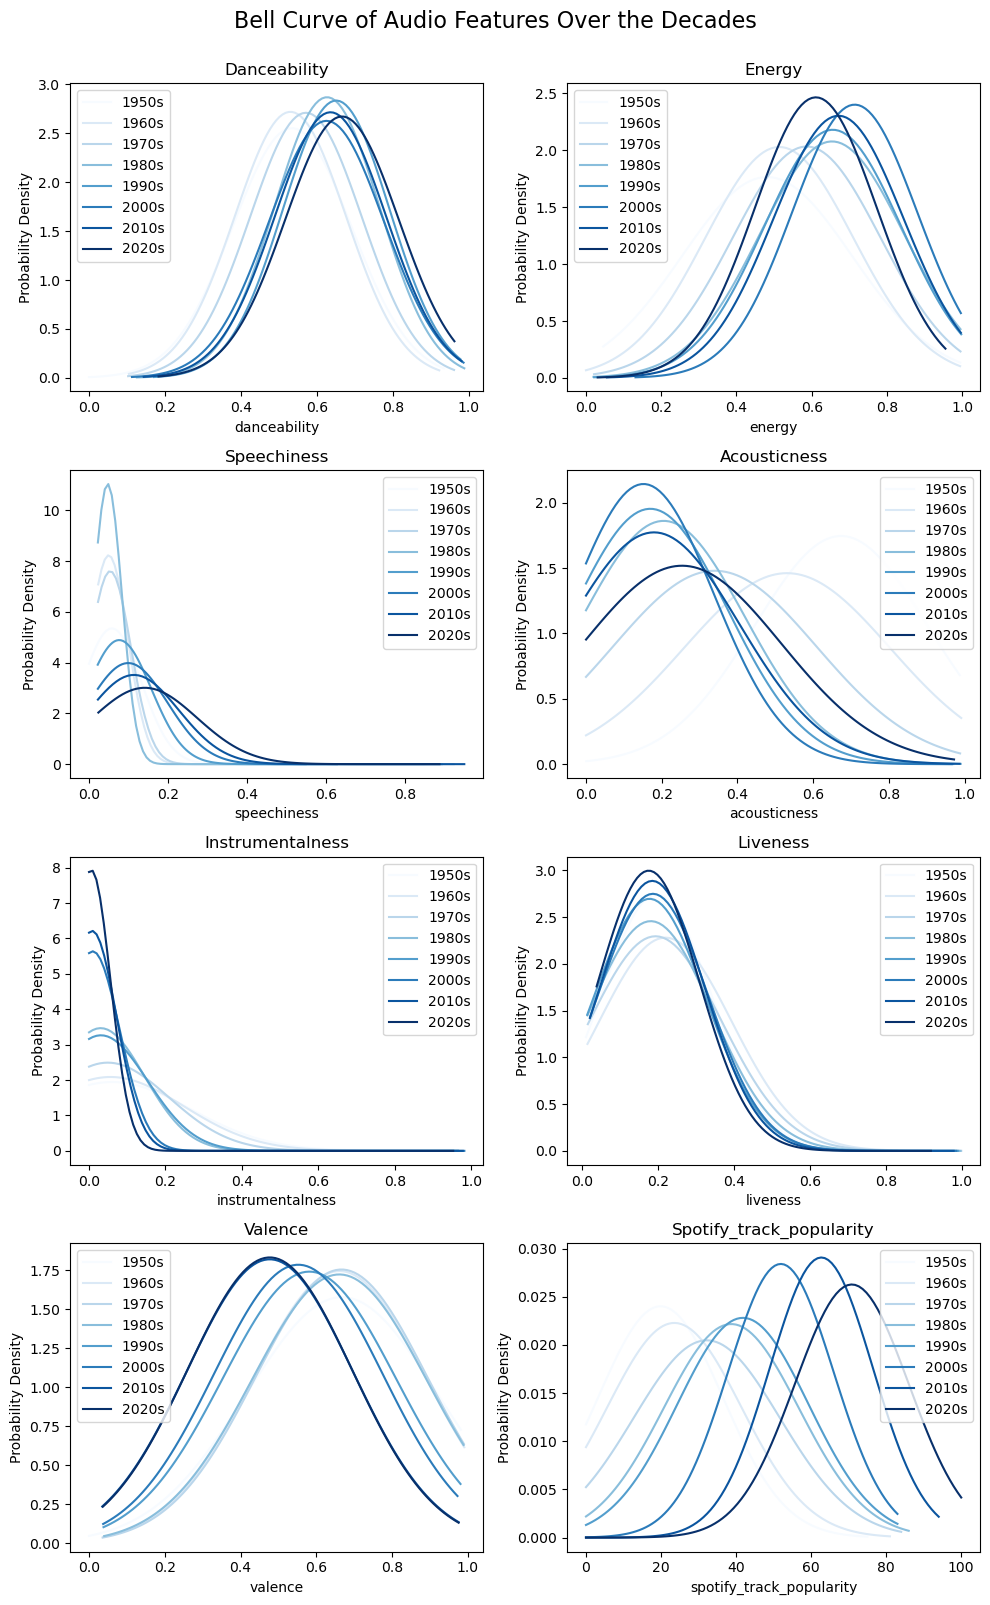

In [198]:
'''Bell Curve of Audio Features Over the Decades'''

import matplotlib.cm as cm

# Define the audio features for which you want to plot bell curves
audio_features_list = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'spotify_track_popularity']

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 2 * len(audio_features_list)))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Define the colormap (use 'Blues' for a blue theme)
colormap = cm.Blues

# Iterate through each audio feature
for i, feature in enumerate(audio_features_list):
    # Plot the bell curve for each decade
    for j, decade in enumerate(range(audio_features_subset['year'].min() // 10 * 10, audio_features_subset['year'].max() // 10 * 10 + 10, 10)):
        data_subset = audio_features_subset[(audio_features_subset['year'] >= decade) & (audio_features_subset['year'] < decade + 10)]

        # Fit a normal distribution to the data
        mu, std = norm.fit(data_subset[feature])

        # Generate x values for the PDF
        x = np.linspace(data_subset[feature].min(), data_subset[feature].max(), 100)
        # Calculate the PDF using the fitted parameters
        pdf = norm.pdf(x, mu, std)

        # Plot the PDF on the corresponding subplot with colormap
        axes[i].plot(x, pdf, label=f'{decade}s', color=colormap(j / len(range(audio_features_subset["year"].min(), audio_features_subset["year"].max(), 10))))

    # Set plot labels and title
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()

# Adjust layout
plt.suptitle('Bell Curve of Audio Features Over the Decades', fontsize=16, y=1)
plt.tight_layout()
plt.show()


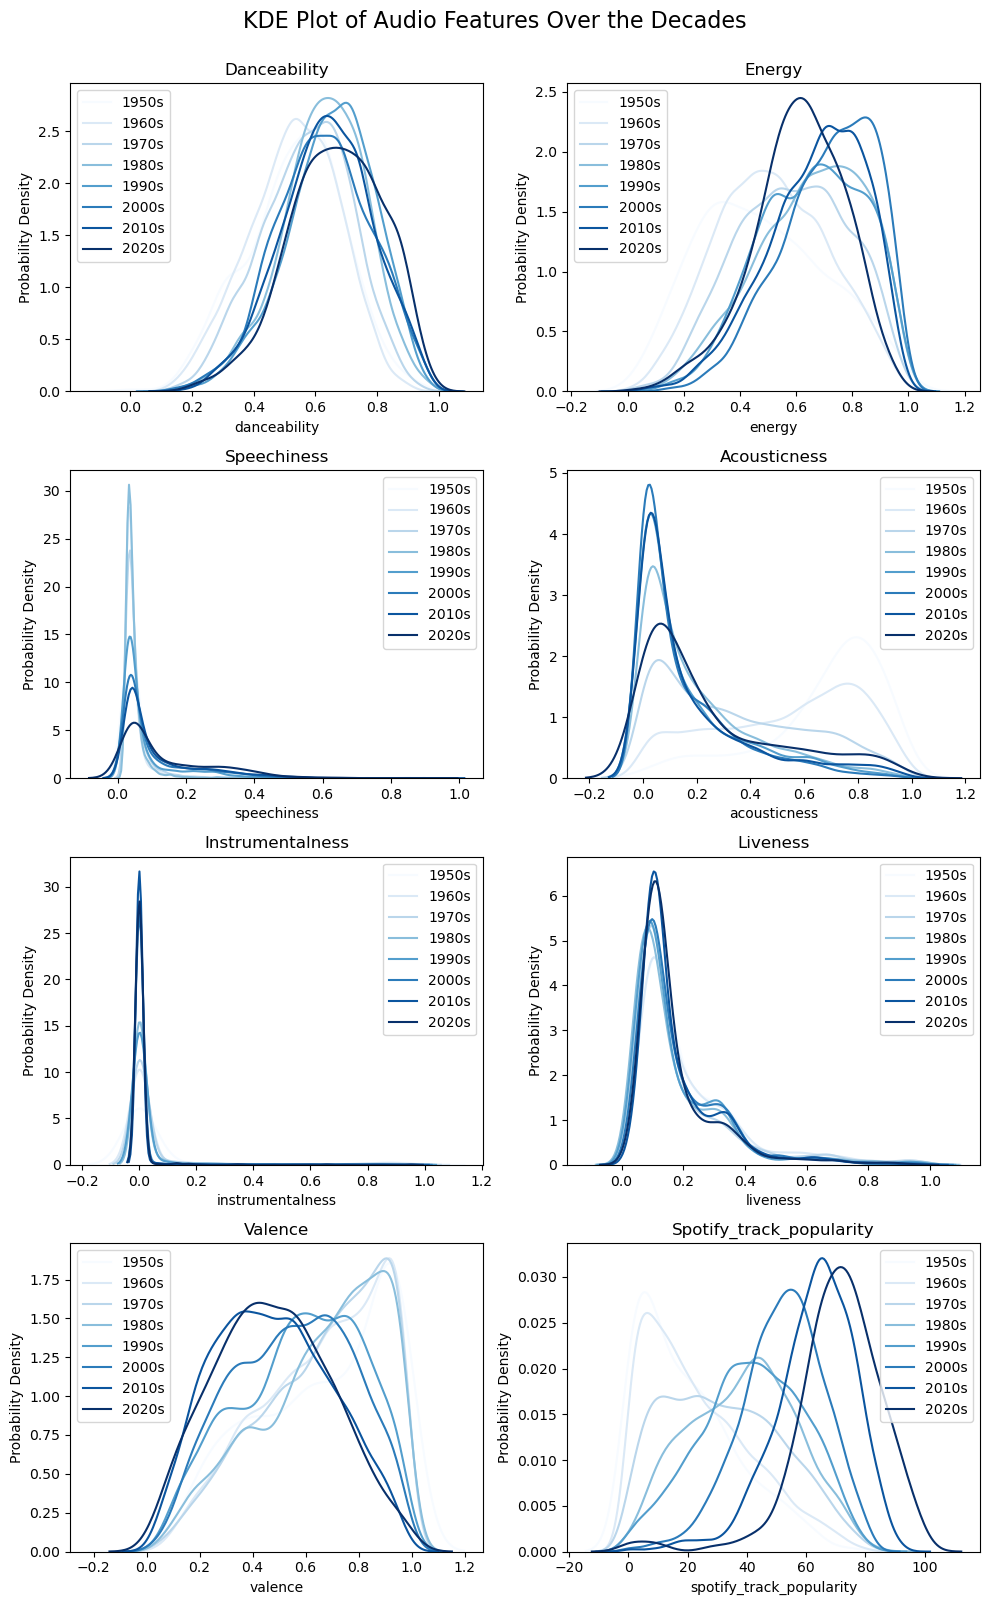

In [197]:
'''Bell Curve of Audio Features Over the Decades'''

# Define the audio features for which you want to plot bell curves
audio_features_list = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'spotify_track_popularity']

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 2 * len(audio_features_list)))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Define the colormap (use 'Blues' for a blue theme)
colormap = cm.Blues

# Iterate through each audio feature
for i, feature in enumerate(audio_features_list):
    # Plot the KDE plot for each decade
    for j, decade in enumerate(range(audio_features_subset['year'].min() // 10 * 10, audio_features_subset['year'].max() // 10 * 10 + 10, 10)):
        data_subset = audio_features_subset[(audio_features_subset['year'] >= decade) & (audio_features_subset['year'] < decade + 10)]

        # Plot the KDE plot on the corresponding subplot with colormap
        sns.kdeplot(data=data_subset[feature], ax=axes[i], label=f'{decade}s', color=colormap(j / len(range(audio_features_subset["year"].min(), audio_features_subset["year"].max(), 10))))

    # Set plot labels and title
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()

# Adjust layout
plt.suptitle('KDE Plot of Audio Features Over the Decades', fontsize=16, y=1)
plt.tight_layout()
plt.show()


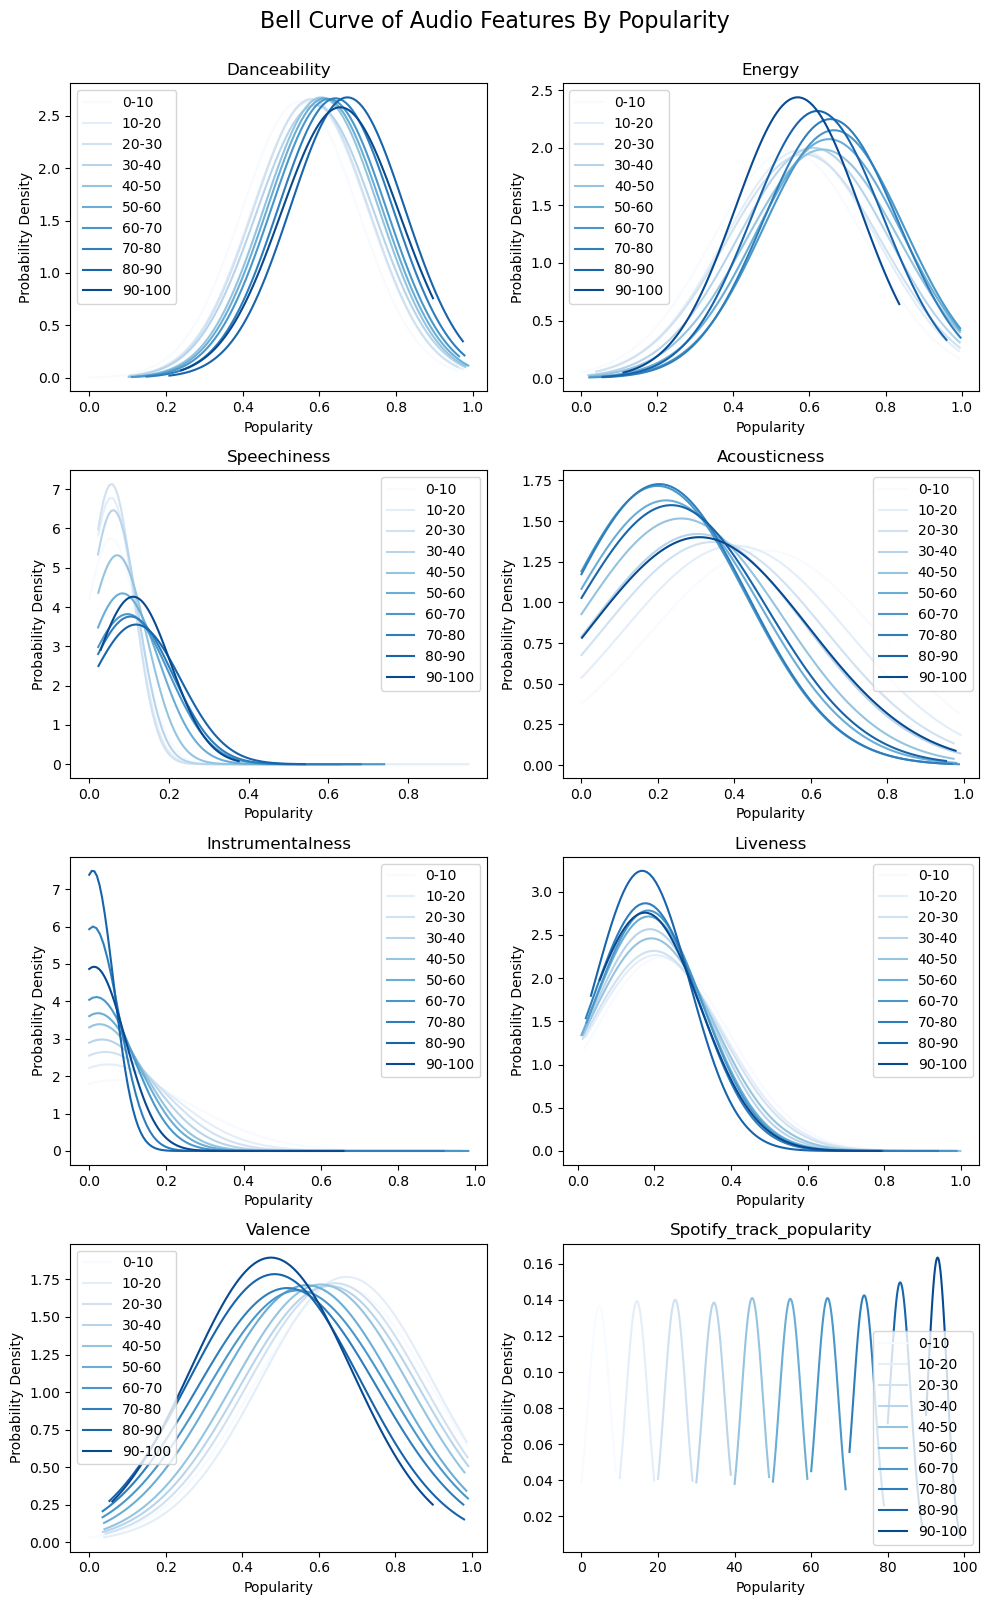

In [205]:
'''Bell Curve of Audio Features By Popularity'''

import matplotlib.cm as cm

# Define the audio features for which you want to plot bell curves
audio_features_list = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'spotify_track_popularity']

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 2 * len(audio_features_list)))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Define the colormap (use 'Blues' for a blue theme)
colormap = cm.Blues

# Define the popularity ranges
popularity_ranges = [(i, i + 10) for i in range(0, 100, 10)]

# Iterate through each audio feature
for i, feature in enumerate(audio_features_list):
    # Plot the bell curve for each popularity range
    for j, (lower, upper) in enumerate(popularity_ranges):
        data_subset = audio_features_subset[(audio_features_subset['spotify_track_popularity'] >= lower) & (audio_features_subset['spotify_track_popularity'] < upper)]

        # Exclude NaN values from the data
        data_subset = data_subset[~data_subset[feature].isna()]

        # Check if the data_subset is not empty
        if not data_subset.empty:
            # Fit a normal distribution to the data
            mu, std = norm.fit(data_subset[feature])

            # Generate x values for the PDF
            x = np.linspace(data_subset[feature].min(), data_subset[feature].max(), 100)
            # Calculate the PDF using the fitted parameters
            pdf = norm.pdf(x, mu, std)

            # Plot the PDF on the corresponding subplot with colormap
            axes[i].plot(x, pdf, label=f'{lower}-{upper}', color=colormap(j / len(popularity_ranges)))

    # Set plot labels and title
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel('Popularity')
    axes[i].set_ylabel('Probability Density')
    axes[i].legend()

# Adjust layout
plt.suptitle('Bell Curve of Audio Features By Popularity', fontsize=16, y=1)
plt.tight_layout()
plt.show()

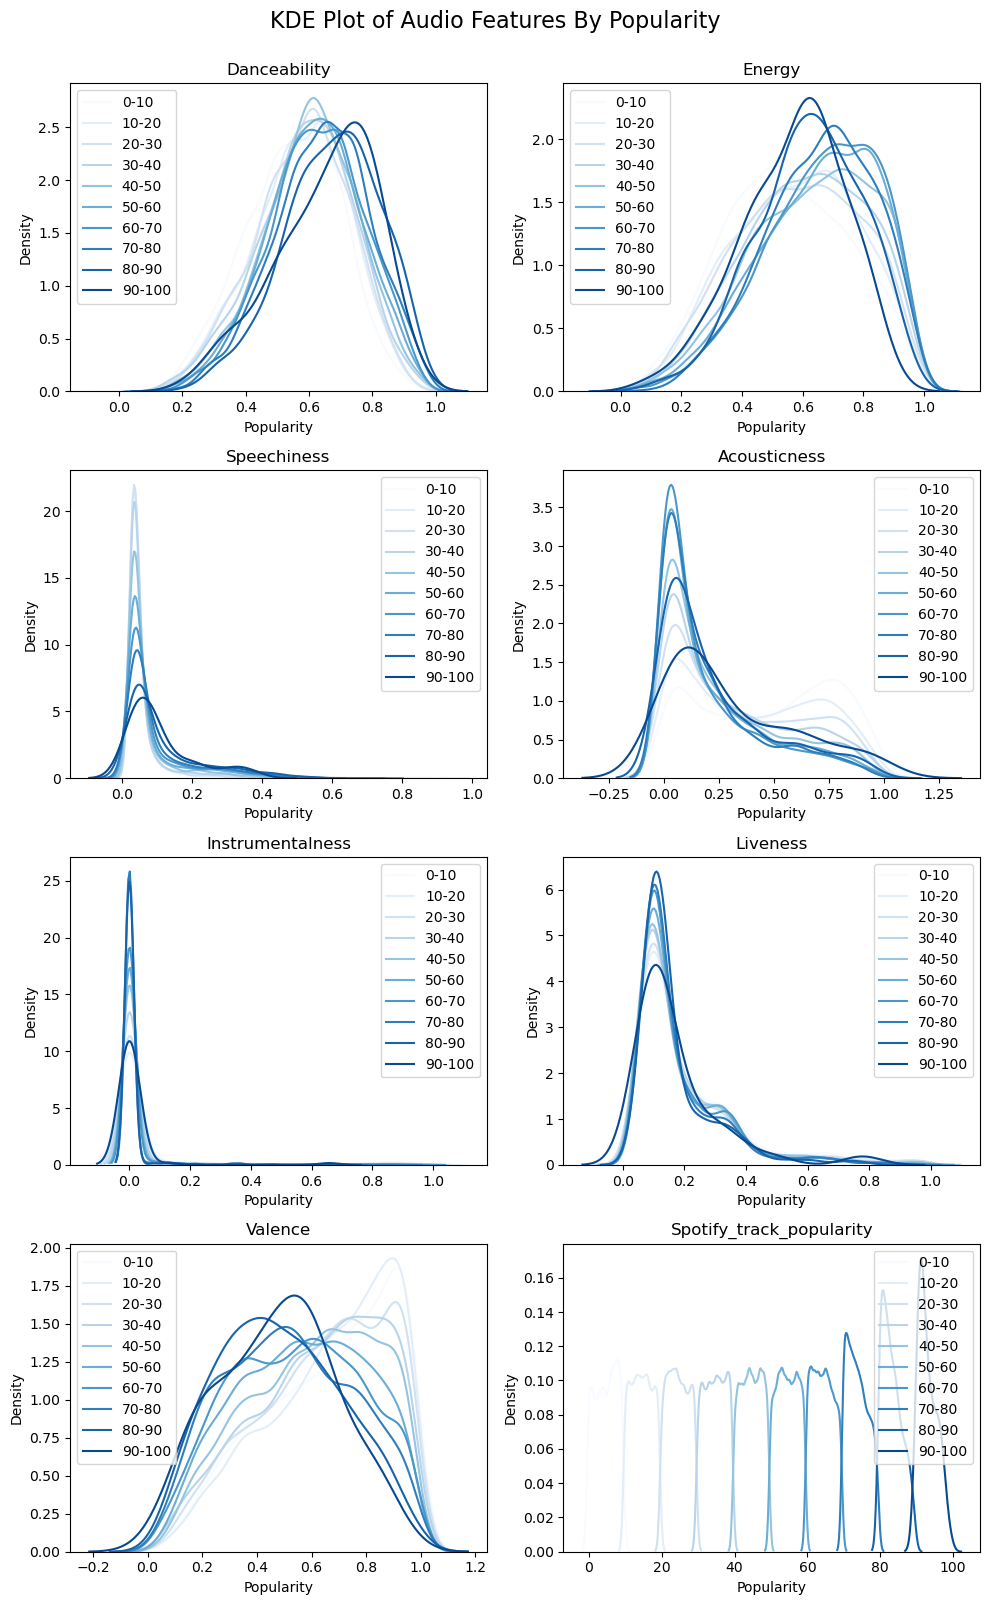

In [206]:
'''KDE Plot of Audio Features By Popularity'''

import seaborn as sns

# Define the audio features for which you want to plot KDE curves
audio_features_list = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'spotify_track_popularity']

# Create subplots with 4 rows and 2 columns
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 2 * len(audio_features_list)))

# Flatten the axes for easier indexing
axes = axes.flatten()

# Define the colormap (use 'Blues' for a blue theme)
colormap = cm.Blues

# Define the popularity ranges
popularity_ranges = [(i, i + 10) for i in range(0, 100, 10)]

# Iterate through each audio feature
for i, feature in enumerate(audio_features_list):
    # Plot the KDE curve for each popularity range
    for j, (lower, upper) in enumerate(popularity_ranges):
        data_subset = audio_features_subset[(audio_features_subset['spotify_track_popularity'] >= lower) & (audio_features_subset['spotify_track_popularity'] < upper)]

        # Exclude NaN values from the data
        data_subset = data_subset[~data_subset[feature].isna()]

        # Check if the data_subset is not empty
        if not data_subset.empty:
            # Plot the KDE on the corresponding subplot with colormap
            sns.kdeplot(data=data_subset[feature], ax=axes[i], label=f'{lower}-{upper}', color=colormap(j / len(popularity_ranges)))

    # Set plot labels and title
    axes[i].set_title(feature.capitalize())
    axes[i].set_xlabel('Popularity')
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Adjust layout
plt.suptitle('KDE Plot of Audio Features By Popularity', fontsize=16, y=1)
plt.tight_layout()
plt.show()
